<a href="https://colab.research.google.com/github/AmarNarayanDwivedi/Statistics-and-EDA-for-ML/blob/main/Types_of_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
telco_data = pd.read_csv('/content/Churn_Modelling.csv')


In [3]:
telco_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [5]:
telco_new = telco_data[['Geography', 'Gender', 'Exited']]
telco_new.head()

,Geography,Gender,Exited
0,France,Female,1
1,Spain,Female,0
2,France,Female,1
3,France,Female,0
4,Spain,Female,0


In [11]:
telco_new.Exited.value_counts()


,count
Exited,
0,7963
1,2037


In [12]:
#total percentage of curn in data

(telco_new.Exited.value_counts() * 100 )/len(telco_new)

,count
Exited,
0,79.63
1,20.37


##Univariate Analysis

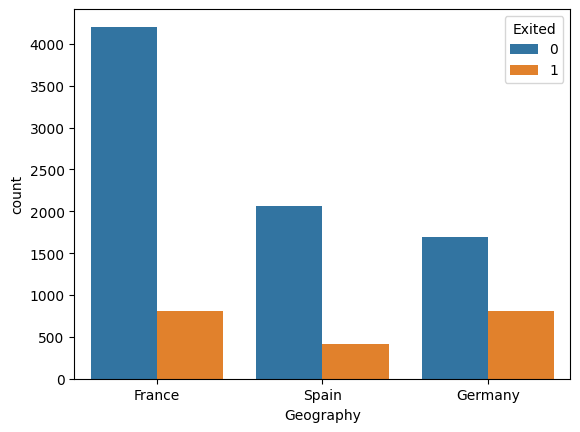

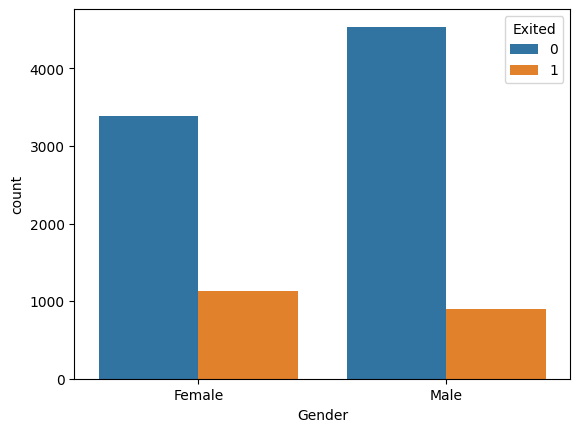

In [9]:
for i , predicator in enumerate(telco_new.drop(columns=['Exited'])):
  plt.figure()
  sns.countplot(data = telco_new, x=predicator, hue = 'Exited')

##Bivarite Analysis

<Axes: xlabel='Gender', ylabel='Count'>

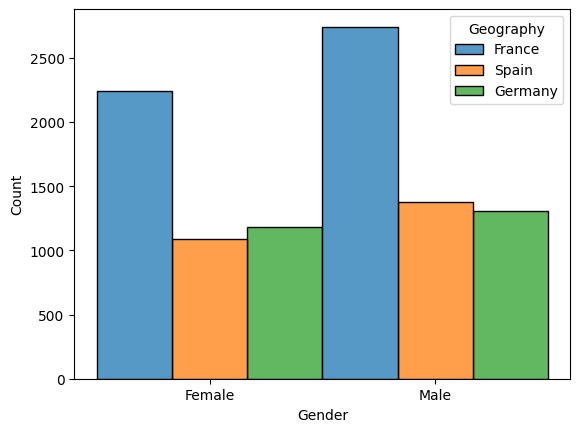

In [13]:
sns.histplot(x='Gender', hue='Geography', data=telco_new, stat="count",multiple="dodge")

In [16]:
telco_new_target1 = telco_new.loc[telco_new["Exited"]==1]

<Axes: xlabel='Gender', ylabel='Count'>

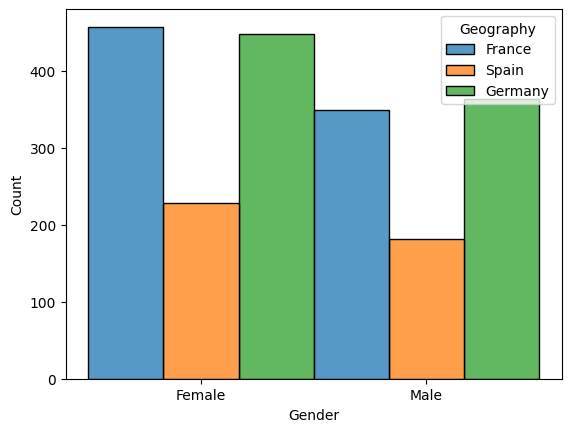

In [17]:
sns.histplot(x='Gender', hue='Geography', data=telco_new_target1, stat="count",multiple="dodge")

##Numerical Analysis

Corealtion: It ranges between from -1 to +1

+1 --> Positive Corelation

-1 --> Negative Corelation

~0 --> NO Corelation

In [29]:
telco_data_numeric = telco_data.select_dtypes(include=[np.number])
telco_data_numeric.corr()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.001125,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.008410,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.004270,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.001125,0.008410,-0.004270,1.000000,-0.006715,0.027877,-0.029745,-0.008586,0.084259,-0.006834,0.283671
Tenure,-0.006495,-0.014883,0.000842,-0.006715,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.027877,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.029745,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.008586,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.084259,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.006834,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Axes: >

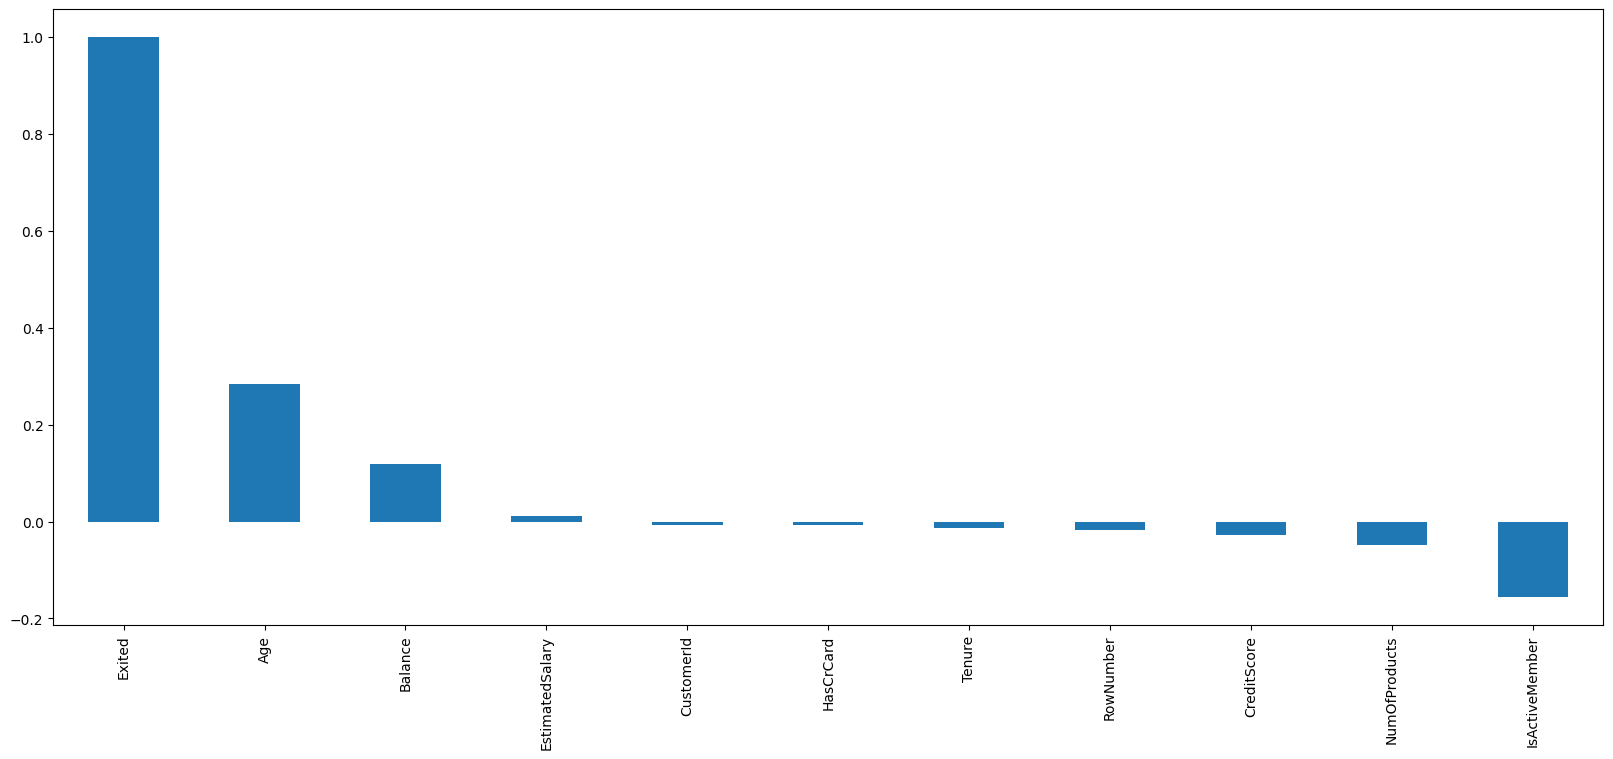

In [33]:
plt.figure(figsize=(20,8))
telco_data_numeric.corr()['Exited'].sort_values(ascending=False).plot(kind='bar')

<Axes: >

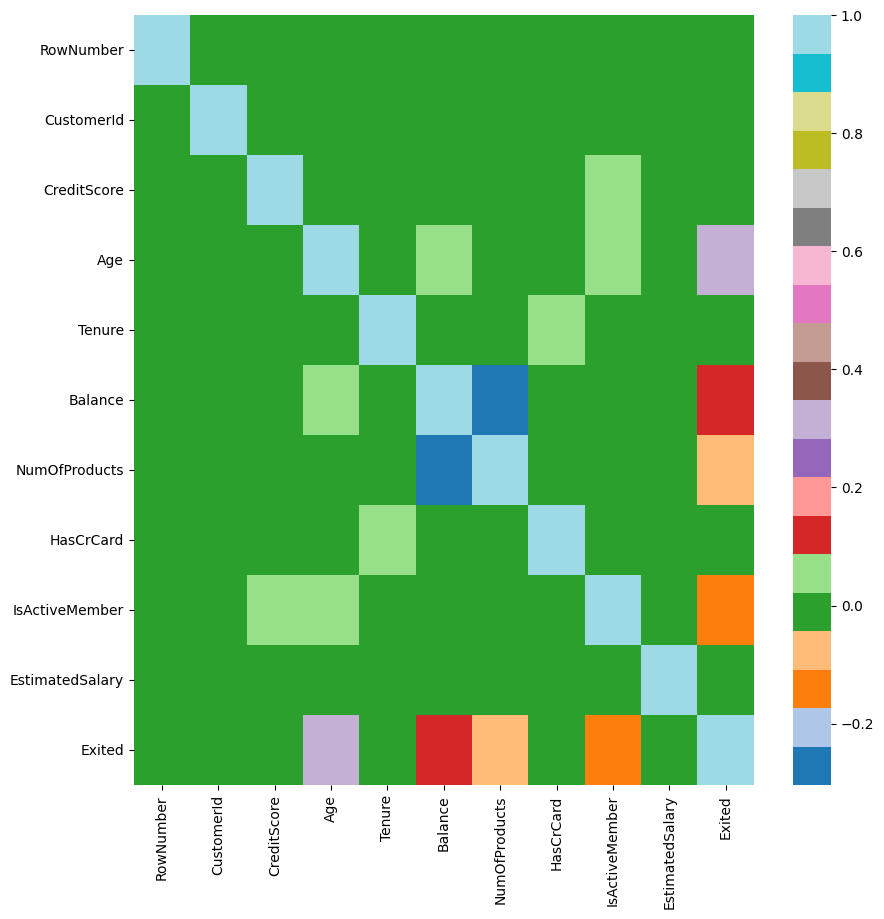

In [42]:
plt.figure(figsize=(10,10))
cmap='tab20'
sns.heatmap(telco_data_numeric.corr(), cmap=cmap)

<Axes: xlabel='Age'>

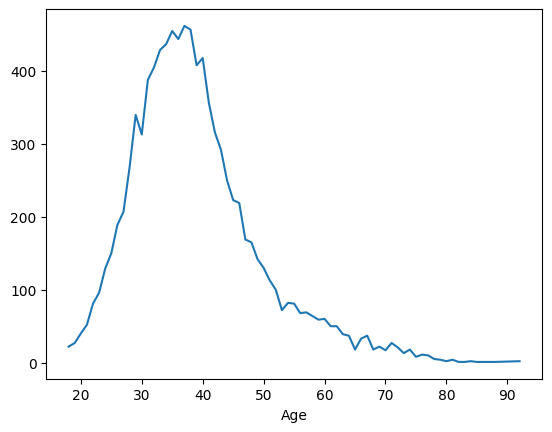

In [45]:
telco_data['Age'].value_counts().sort_index(ascending=True).plot()

<ipython-input-50-bfe762561517>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_data.Age[(telco_data["Exited"]==0)],
<ipython-input-50-bfe762561517>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_data.Age[(telco_data["Exited"]==1)],


Text(0.5, 1.0, 'Age by churn')

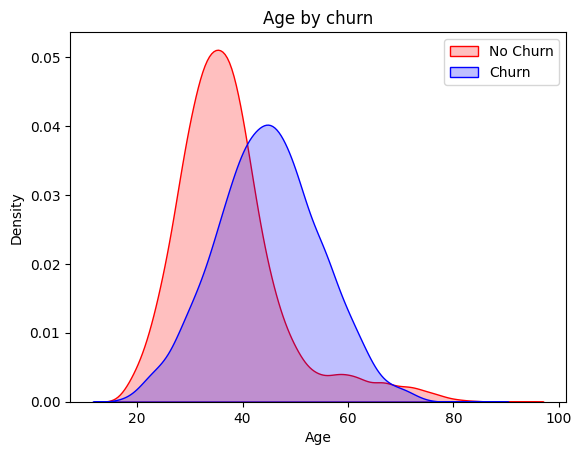

In [50]:
Tot = sns.kdeplot(telco_data.Age[(telco_data["Exited"]==0)],
                  color="Red", shade=True)
Tot = sns.kdeplot(telco_data.Age[(telco_data["Exited"]==1)],
                  color="Blue", shade=True)
Tot.legend(["No Churn", "Churn"], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Age')
Tot.set_title('Age by churn')



```
# This is formatted as code
```

